# 台灣同性婚姻論述分析(II): 同性戀 v.s. 同志

首先問問大家，不知道大家心目中對於「同性戀」和「同志」這兩個詞有什麼感覺？如果要你解釋一下這兩個詞有什麼異同，你會怎麼說？

我們都知道這兩個詞幾乎是同義詞，舉例來說，說一個人是「同志」和說一個人是「同性戀」，應該是在表達相同的意思。你可以反對這一點，也許你覺得「同性戀」比較是個醫學上的專業術語，而「同志」似乎比較口語。我想透過觀察這一組同義詞在兩個語料中的分布狀況，想看看這兩個詞被提及的頻率是否是差不多的，以及這兩個詞在兩個語料中是如何使用的。

這個主題應該會分成好幾篇文章來處理，本篇只會處理前者，也就是先觀察兩邊語料的頻率分佈。至於後個問題會需要利用到 concordance 這樣的工具來回來，還不確定會需要多大的篇幅來處理。

因為本篇只涉及簡單的頻率分析，所以我把焦點放在實作上：如何將純文字檔丟入`nltk`套件做計算，以及如何利用`pandas`和`seaborn`畫出簡單的柱狀比較圖。（光是要讓seaborn能顯示出中文字體就搞了我半個下午...）

首先匯入必要套件：

In [62]:
import nltk
import re
import jieba
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.font_manager import FontProperties

# 下面即是讓 seaborn 顯示出中文字體的方法
# 由於 seaborn 底層是透過 matplotlib 進行繪製，所以還是會需要用到 matplotlib
# 具體的方法和流程請參考：https://medium.com/marketingdatascience/%E8%A7%A3%E6%B1%BApython-3-matplotlib%E8%88%87seaborn%E8%A6%96%E8%A6%BA%E5%8C%96%E5%A5%97%E4%BB%B6%E4%B8%AD%E6%96%87%E9%A1%AF%E7%A4%BA%E5%95%8F%E9%A1%8C-f7b3773a889b
myfont = FontProperties(fname='/usr/local/lib/python3.7/site-packages/matplotlib/mpl-data/fonts/ttf/msj.ttf',size=14)
sns.set(font=myfont.get_name())

%matplotlib inline

再匯入我已經前處理好的兩個語料：

In [63]:
# 匯入伴侶盟語料文字檔
with open("line_sentence_lgbtfamily.txt") as f:
    lgbtfamily_raw_text = f.read()

# 匯入下福盟語料文字檔    
with open("line_sentence_lovefamily.txt") as f:
    lovefamily_raw_text = f.read()

以下將利用 `nltk.text.Text` 的功能，先將文本實例化為 `Text` 類別的物件後，就可以利用 `nltk.text.Text` 這個類別已為我們實作好的很多方便功能，像是`Text.count()`(數語料中某詞出現的頻率) 和 `Text.concordance()`(給出某詞在語料中的concordance)。

要將文本丟入 `nltk.text.Text()`，首先需要將文本轉換成 list of words，也就是要先把文本拆成一個詞一個詞的`list`:

In [64]:
# 將文本拆成 list of words
lgbtfamily_word_list = [word for sentence in lgbtfamily_raw_text.split('\n') for word in sentence.split(' ')]
lovefamily_word_list = [word for sentence in lovefamily_raw_text.split('\n') for word in sentence.split(' ')]

轉換好 `nltk.text.Text()` 可以接收的資料結構後，丟入 `nltk.text.Text()`

In [65]:
# 轉換好後，丟入 nltk.text.Text
lovefamily_text = nltk.text.Text(lovefamily_word_list)
lgbtfamily_text = nltk.text.Text(lgbtfamily_word_list)

## 比較「同志」和「同性戀」出現在兩方語料中的頻率

這次的主題是要比較「同志」和「同性戀」出現的次數。我將練習使用 `nltk.text.Text.count()` 這個方法。這個方法接收一個字串參數，會回傳給你該文本中出現該詞的頻率數量。讓我們先看一下 `nltk.text.Text.count()` 的文件：

In [66]:
help(nltk.text.Text.count)

Help on function count in module nltk.text:

count(self, word)
    Count the number of times this word appears in the text.



接著用上面已經做好的兩個`Text`物件，來看「同志」和「同性戀」這兩詞出現的頻率。

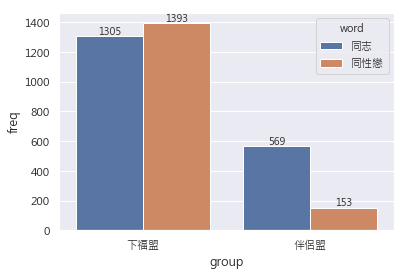

In [67]:
# 下福盟語料中出現的「同志」次數
lovefamily_tongzhi = lovefamily_text.count('同志')

# 伴侶盟語料中出現的「同志」次數
lgbtfamily_tongzhi = lgbtfamily_text.count('同志')

# 下福盟語料中出現的「同性戀」次數
lovefamily_tongxinglian = lovefamily_text.count('同性戀')

# 伴侶盟語料中出現的「同性戀」次數
lgbtfamily_tongxinglian = lgbtfamily_text.count('同性戀')

# 轉換成方便做圖的 DataFrame
df = pd.DataFrame([
    {
    "word": "同志",
    "freq": lovefamily_tongzhi,
    "group": "下福盟"
    },
    {
    "word": "同性戀",
    "freq": lovefamily_tongxinglian,
    "group": "下福盟"
    },
    {
    "word": "同志",
    "freq": lgbtfamily_tongzhi,
    "group": "伴侶盟"
    },
    {
    "word": "同性戀",
    "freq": lgbtfamily_tongxinglian,
    "group": "伴侶盟"
    },
])

# 使用 seaborn 作圖
barplot = sns.barplot(x="group", y="freq", hue="word", data=df)

# 在每個 bar 上加入總數
for p in barplot.patches:
    barplot.text(
        p.get_x() + p.get_width() / 2,
        p.get_height() + 10,
        int(p.get_height()),
        ha="center")

由上圖可以看出，在下福盟的語料中，「同志」與「同性戀」兩詞出現的頻率不相上下，「同性戀」出現的次數略高於「同志」。但在伴侶盟的語料中，「同性戀」一詞(153次)的頻率遠低於「同志」(569次)，這不禁讓人好奇，下福盟中的平均分佈以及伴侶盟中的懸殊差距究竟意味著什麼。平均分佈能代表這兩個詞在下福盟語料中是同義詞嗎？懸殊差距能代表這兩個詞在伴侶盟語料中是不同的意思嗎？目前應該還無法妄下判斷。但大家還是可以先猜測看看，畢竟我們日常生活中也常常會在媒體網路上接觸到這兩個詞，回到本文最開頭的問題，你自己平常又是如何使用這兩個詞的呢？你覺得這兩個詞傳達什麼不一樣的訊息嗎？下篇文章將會接續
利用`nltk`套件中的concordance來檢視，究竟這兩個詞在這兩個語料中都是如何使用的。
